In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('/Healthcare Providers.csv')

#basic information

print(df.shape)
print(df.info())
print(df.describe())

#Missing values per column
print(df.isnull().sum())


threshold = int(df.shape[1] * 0.2)

# Drop rows with more than 20% missing values
df = df.dropna(thresh=df.shape[1] - threshold)
print("Shape after dropping rows with >20% missing values:", df.shape)

# Fill missing values in 'First Name of the Providers' with values from 'Middle Name'
df['First Name of the Provider'] = df['First Name of the Provider'].fillna(df['Middle Initial of the Provider'])

# Drop the 'Middle Name' column
df.drop(columns=['Middle Initial of the Provider'], inplace=True)

# Check for missing values in the 'Last Name' column
missing_last_name = df['Last Name/Organization Name of the Provider'].isnull().sum()
if missing_last_name > 0:
    print(f"There are {missing_last_name} missing values in the 'Last Name' column.")
else:
    print("There are no missing values in the 'Last Name' column.")

# Fill missing values in 'First Name of the Providers' with values from 'Last Name'
df['First Name of the Provider'] = df['First Name of the Provider'].fillna(df['Last Name/Organization Name of the Provider'])

# Drop 'Street Address 2 of the Provider'
df.drop(columns=['Street Address 2 of the Provider'], inplace=True)

print(df.isna().sum())
print(df.shape)

# Fill missing values in numerical columns with the median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill missing values in categorical columns with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Removing the duplicate values
df.drop_duplicates(inplace=True)
print(df.isna().sum())
print(df)

df.to_csv('/cleaned_data.csv', index=False)

(100000, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  objec

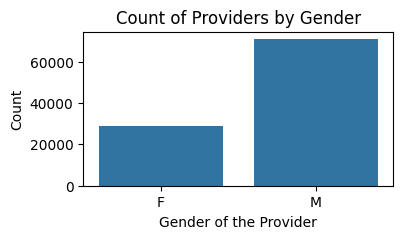

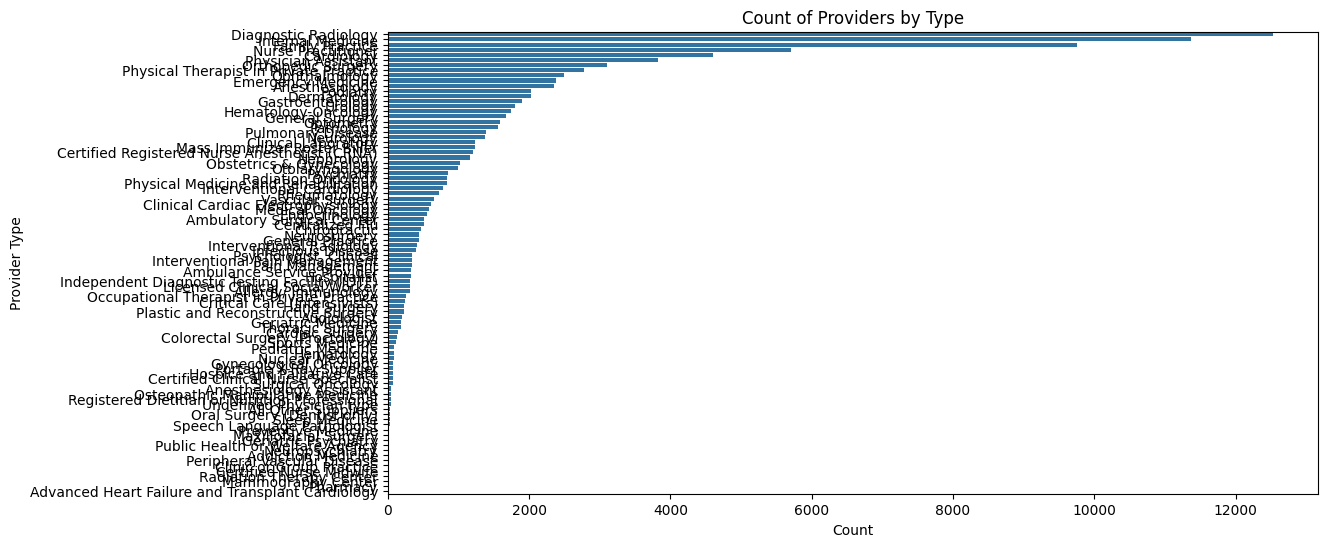

<ipython-input-15-be48392c716c>:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Provider Type', y='Average Medicare Payment Amount', ci=None)


<Figure size 1500x500 with 0 Axes>

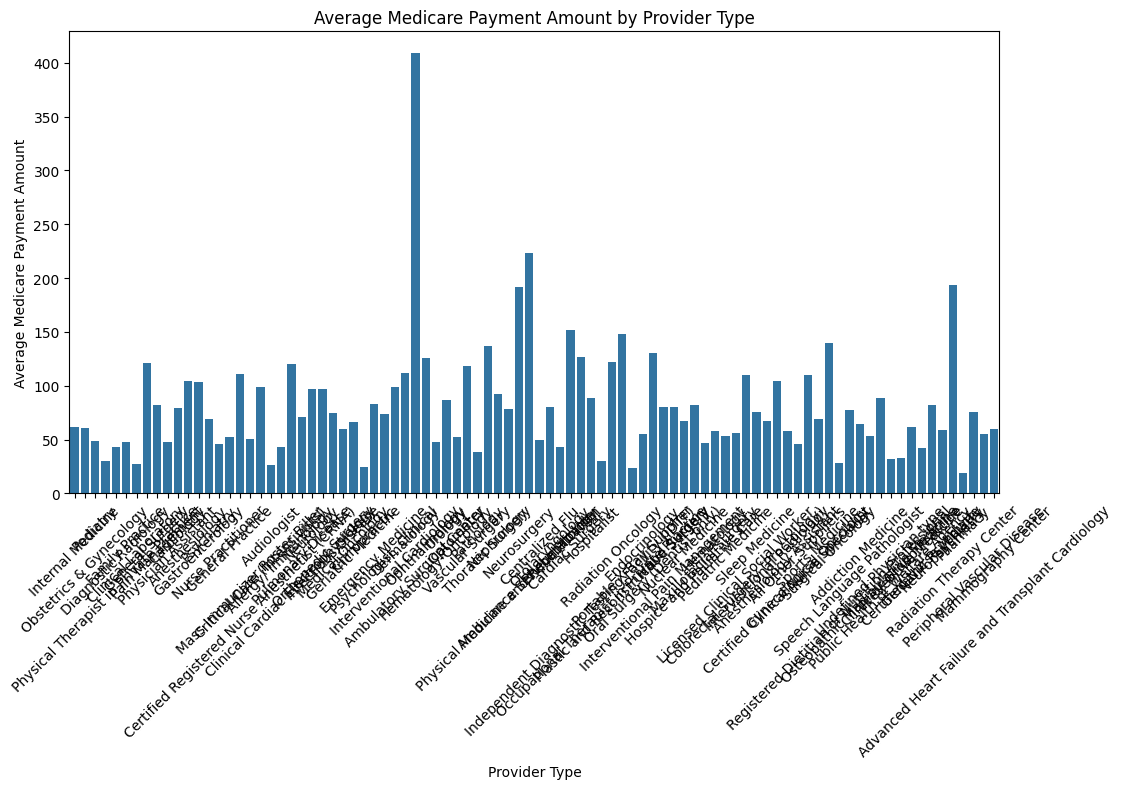

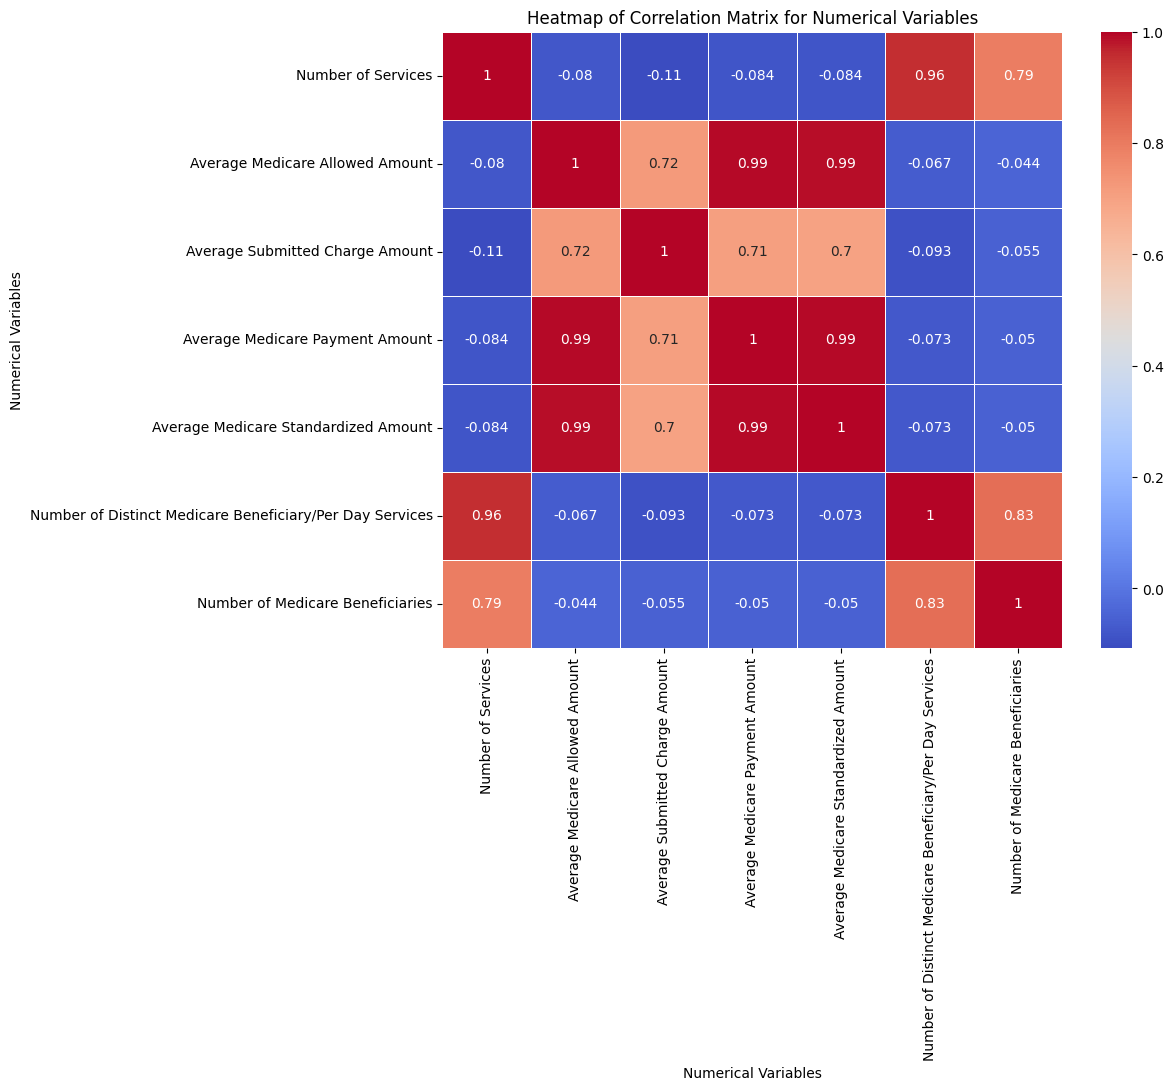

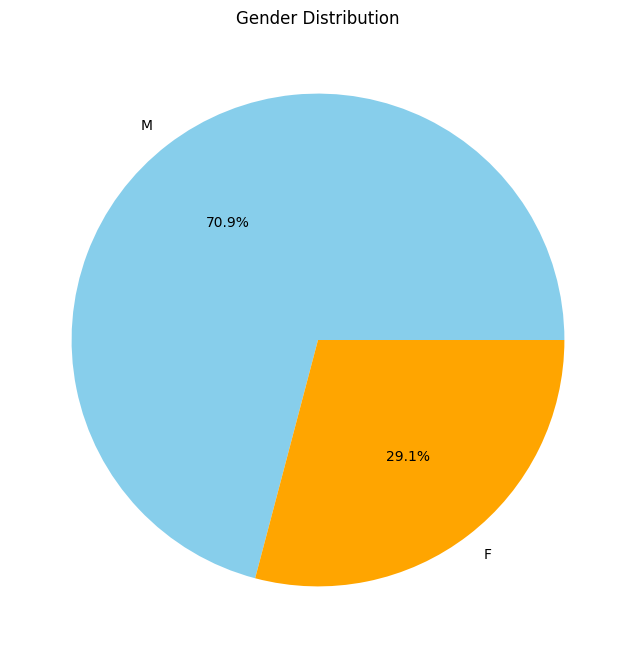

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt


df = pd.read_csv('/cleaned_data.csv')

#converting numeric columns from object type to numeric type
df['Number of Services'] = pd.to_numeric(df['Number of Services'], errors='coerce')
df['Number of Medicare Beneficiaries'] = pd.to_numeric(df['Number of Medicare Beneficiaries'], errors='coerce')
df['Zip Code of the Provider'] = pd.to_numeric(df['Zip Code of the Provider'], errors='coerce')
df['Average Medicare Allowed Amount'] = pd.to_numeric(df['Average Medicare Allowed Amount'], errors='coerce')
df['Average Submitted Charge Amount'] = pd.to_numeric(df['Average Submitted Charge Amount'], errors='coerce')
df['Average Medicare Payment Amount'] = pd.to_numeric(df['Average Medicare Payment Amount'], errors='coerce')
df['Average Medicare Standardized Amount'] = pd.to_numeric(df['Average Medicare Standardized Amount'], errors='coerce')
df['Number of Distinct Medicare Beneficiary/Per Day Services']=pd.to_numeric(df['Number of Distinct Medicare Beneficiary/Per Day Services'],errors='coerce')


# Count plot for Gender of the Provider
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='Gender of the Provider')
plt.title('Count of Providers by Gender')
plt.xlabel('Gender of the Provider')
plt.ylabel('Count')
plt.show()

# Count plot for Provider Type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Provider Type', order=df['Provider Type'].value_counts().index)
plt.title('Count of Providers by Type')
plt.xlabel('Count')
plt.ylabel('Provider Type')
plt.show()

#initalizing an array of all the numeric columns
numeric=['Number of Services', 'Average Medicare Allowed Amount',
        'Average Submitted Charge Amount',
        'Average Medicare Payment Amount',
        'Average Medicare Standardized Amount',
        'Number of Distinct Medicare Beneficiary/Per Day Services',
        'Number of Medicare Beneficiaries']
#data distribution in numric columns
plt.figure(figsize=(15, 5))
plt.suptitle('Data Distribution in Numeric Columns', fontsize=20, fontweight='bold')

# Bar Chart for Average Payment Amount by Provider Type
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Provider Type', y='Average Medicare Payment Amount', ci=None)
plt.title('Average Medicare Payment Amount by Provider Type')
plt.xlabel('Provider Type')
plt.ylabel('Average Medicare Payment Amount')
plt.xticks(rotation=45)
plt.show()

# HeatMap analysis
df_numeric = df[numeric]
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix for Numerical Variables")
plt.xlabel("Numerical Variables")
plt.ylabel("Numerical Variables")
plt.show()

# Pie Chart for Gender Distribution
plt.figure(figsize=(8, 8))
df['Gender of the Provider'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


df.to_csv('/vis_data.csv', index=False)

<ipython-input-16-8d23a4530850>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Z_Score'] = zscore(dataset[column_name])
<ipython-input-16-8d23a4530850>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Z_Score'] = zscore(dataset[column_name])
<ipython-input-16-8d23a4530850>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Percentage of data removed using Z-Score: 21.02%

Summary statistics after outlier removal:
              index  National Provider Identifier  Zip Code of the Provider  \
count  7.898100e+04                  7.898100e+04              7.898100e+04   
mean   4.908274e+06                  1.498274e+09              4.162959e+08   
std    2.838341e+06                  2.872724e+08              3.078187e+08   
min    2.090000e+02                  1.003001e+09              6.010000e+02   
25%    2.458114e+06                  1.245659e+09              1.460740e+08   
50%    4.899554e+06                  1.497838e+09              3.705521e+08   
75%    7.348135e+06                  1.740367e+09              6.800819e+08   
max    9.847440e+06                  1.993000e+09              9.990166e+08   

       Number of Services  Number of Medicare Beneficiaries  \
count        78981.000000                      78981.000000   
mean            67.653124                         46.306479   
std    

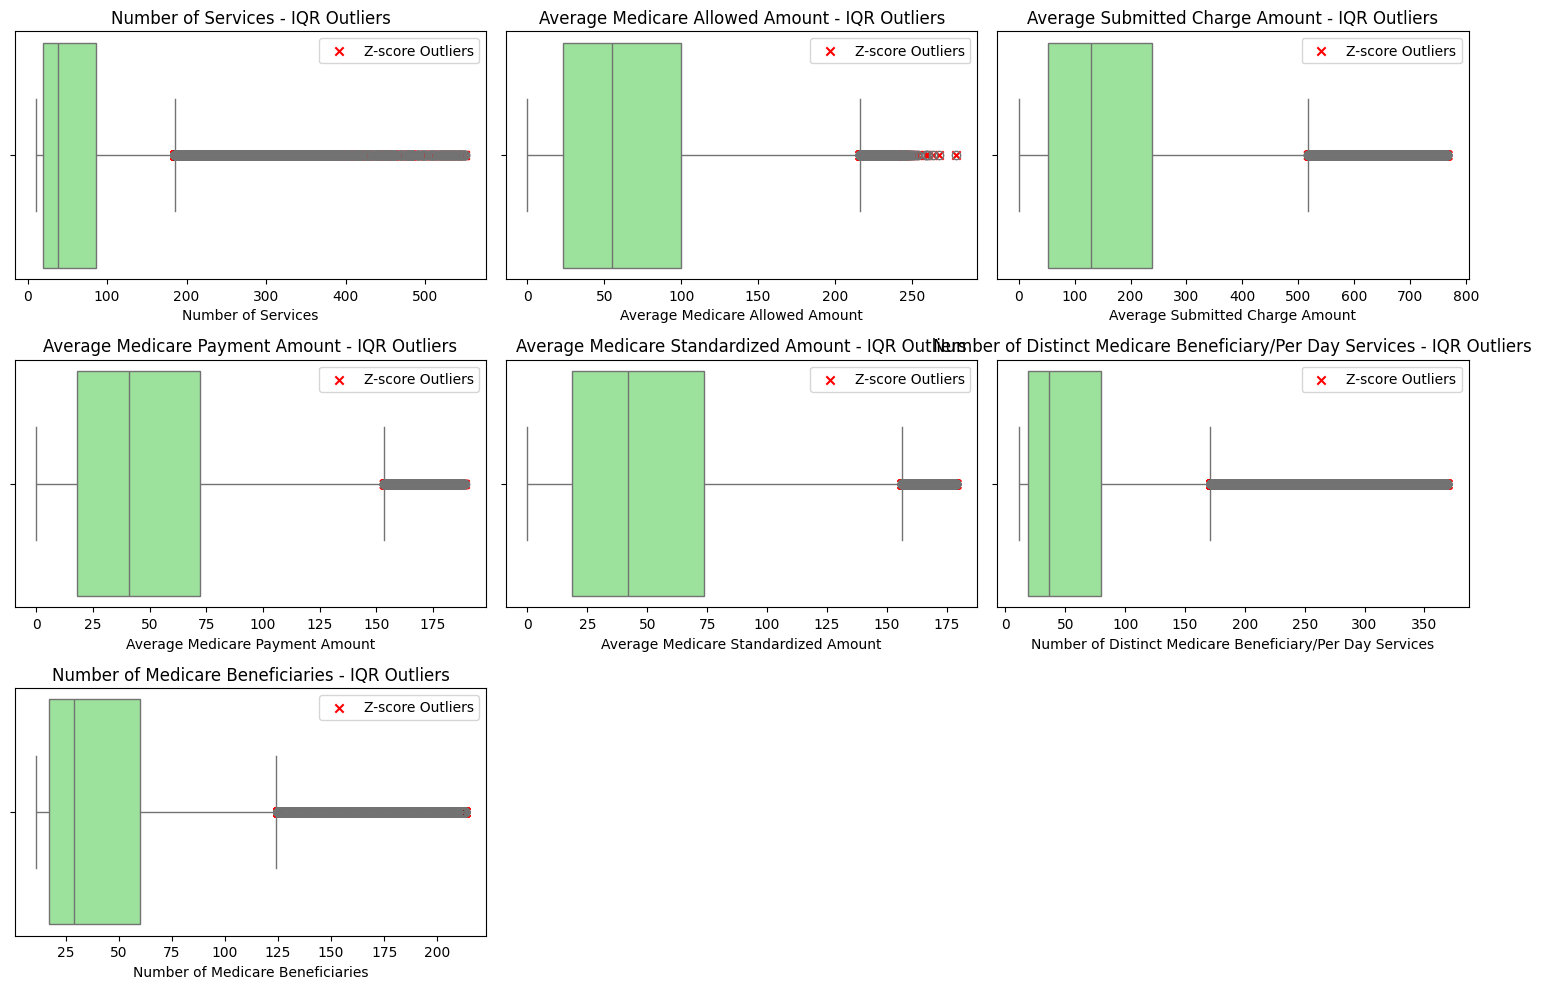

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('/vis_data.csv')

# Initial dataset size
original_size = data.shape[0]

# Function for Z-Score based outlier removal
def zscore_outlier_removal(dataset, column_name, z_threshold=3):
    """
    Removes rows where the Z-score of the specified column exceeds the threshold.
    :param dataset: DataFrame to clean
    :param column_name: Column to calculate Z-scores on
    :param z_threshold: Threshold for identifying outliers
    :return: Updated DataFrame with outliers removed
    """
    # Convert column to numeric if necessary
    dataset[column_name] = pd.to_numeric(dataset[column_name], errors='coerce')
    dataset = dataset.dropna(subset=[column_name])  # Drop rows with NaN in the column

    # Compute Z-Scores and filter based on the threshold
    dataset['Z_Score'] = zscore(dataset[column_name])
    clean_data = dataset[np.abs(dataset['Z_Score']) <= z_threshold].copy()

    # Remove the Z-Score column after filtering
    clean_data.drop(columns=['Z_Score'], inplace=True)
    return clean_data

# Define numeric columns
numerical_columns = [
    'Number of Services', 'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount', 'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Number of Medicare Beneficiaries'
]

# Remove outliers for each column
for column in numerical_columns:
    data = zscore_outlier_removal(data, column)

# Calculate the percentage of rows removed
remaining_size = data.shape[0]
percent_removed = ((original_size - remaining_size) / original_size) * 100
print(f"Percentage of data removed using Z-Score: {percent_removed:.2f}%")

# Updated summary statistics
print("\nSummary statistics after outlier removal:")
print(data.describe())

# Visualization: Boxplots with IQR-based outliers highlighted
plt.figure(figsize=(15, 10))
for idx, col in enumerate(numerical_columns, start=1):
    q1, q3 = np.percentile(data[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_indices = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index

    plt.subplot(3, 3, idx)
    sns.boxplot(x=data[col], color='lightgreen')
    plt.scatter(data.loc[outlier_indices, col], [0] * len(outlier_indices), color='red', marker='x', label='Z-score Outliers')
    plt.title(f'{col} - IQR Outliers')
    plt.legend()

plt.tight_layout()
plt.show()


data.to_csv('/z-score_data.csv', index=False)


Percentage of data removed: 38.00%


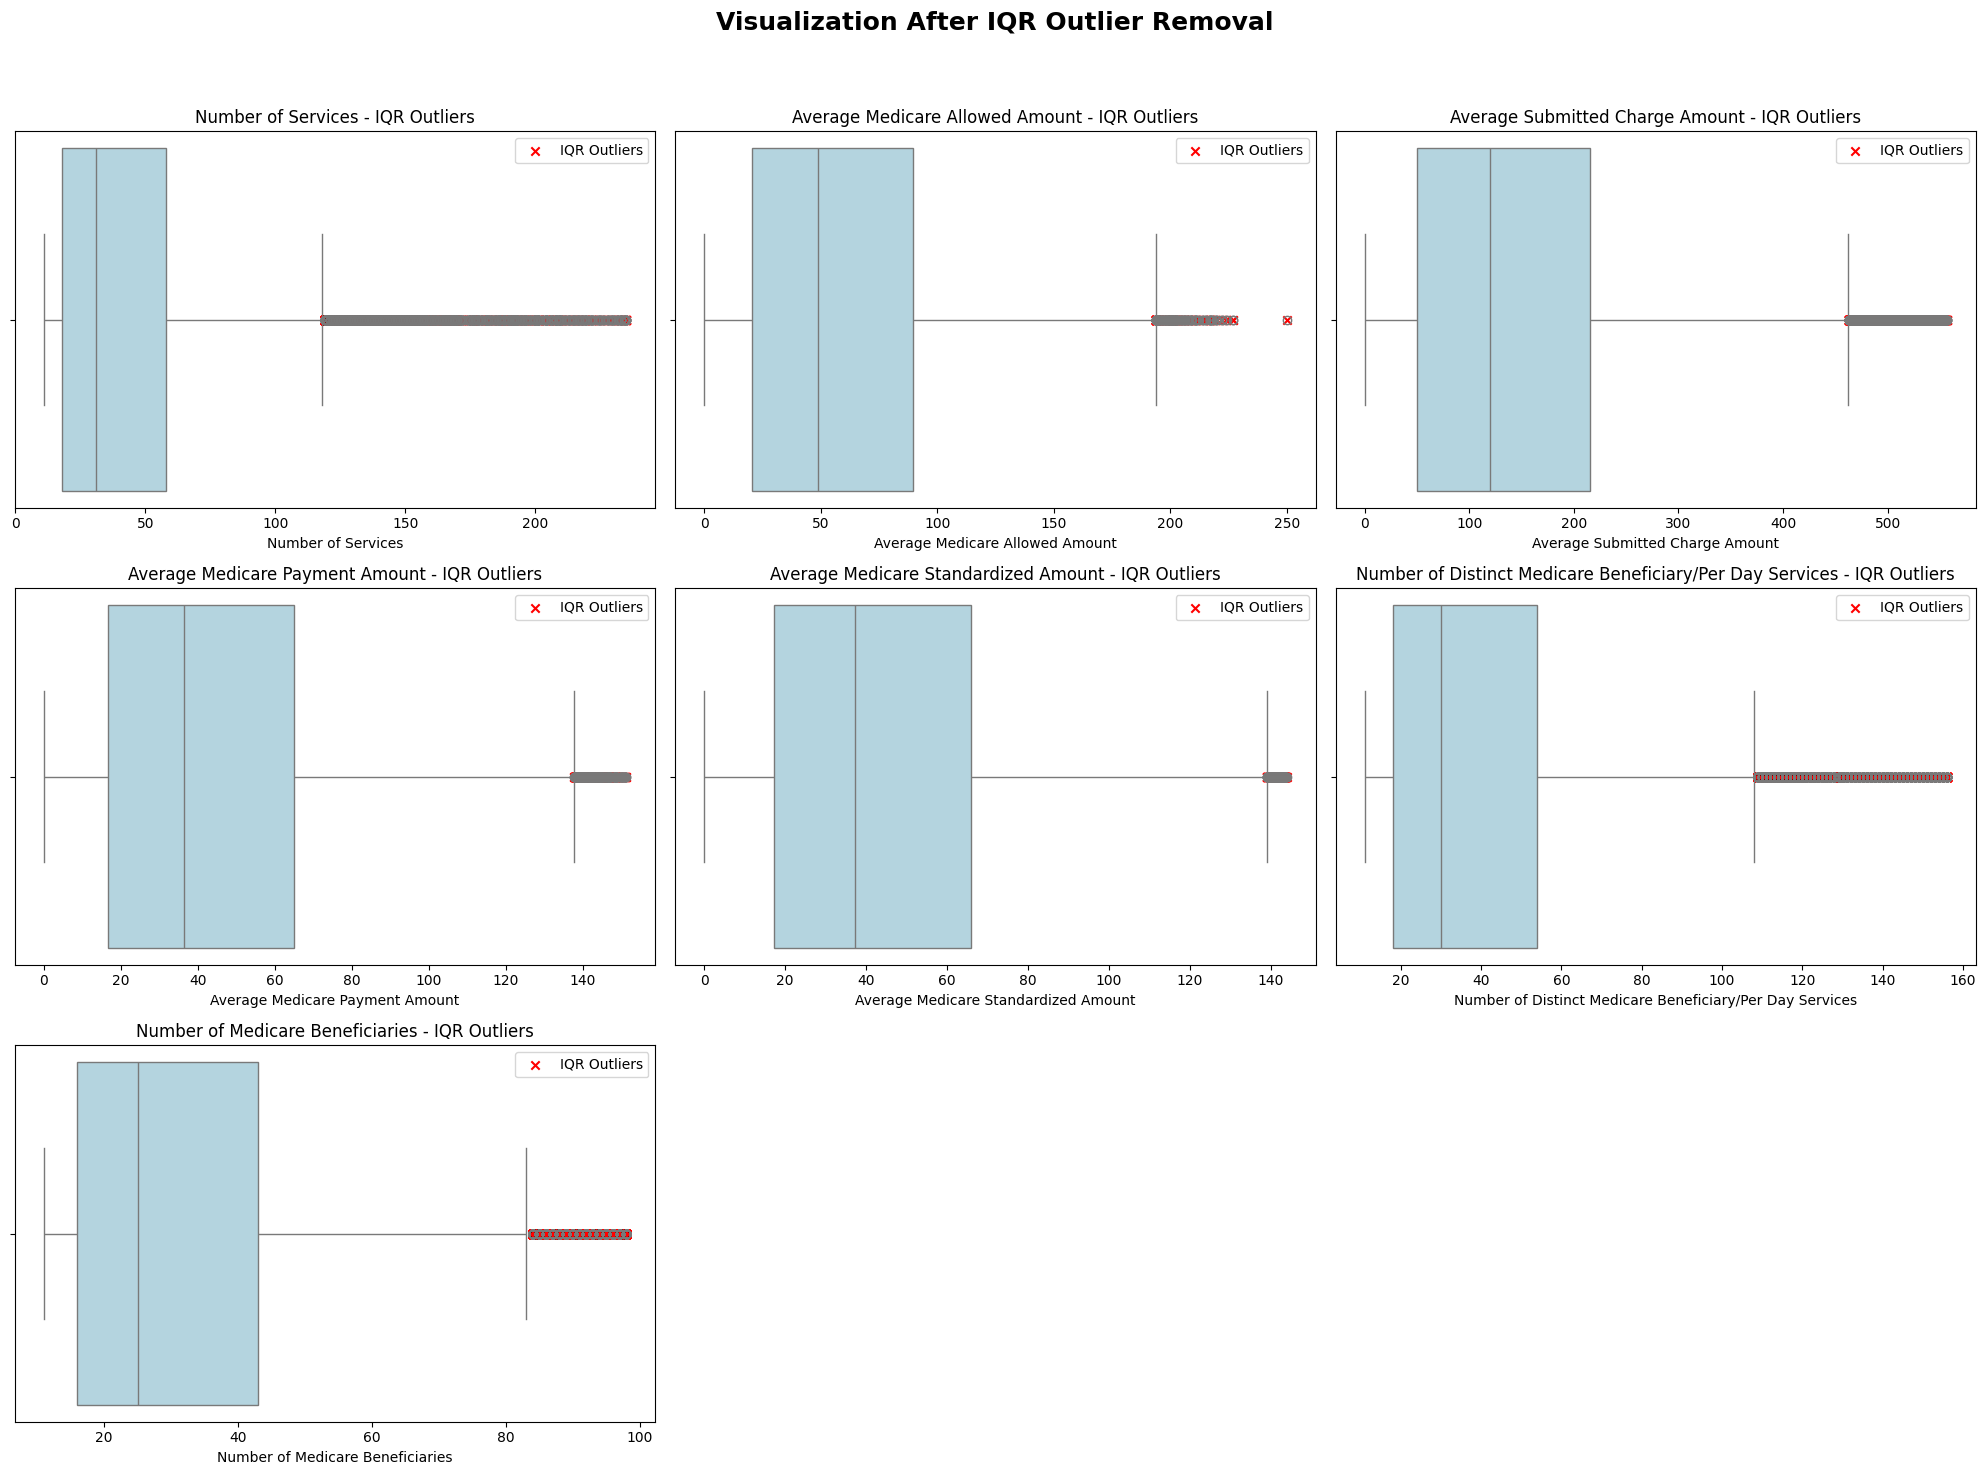

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


dataset = pd.read_csv('/vis_data.csv')

# Function to remove outliers based on IQR
def filter_outliers_iqr(data, feature, factor=1.5):
    """
    Removes outliers using the IQR method.
    :param data: Input DataFrame
    :param feature: Column to process for outliers
    :param factor: IQR multiplier for defining outlier thresholds
    :return: DataFrame after outlier removal
    """
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - factor * iqr
    upper = q3 + factor * iqr
    return data[(data[feature] >= lower) & (data[feature] <= upper)]

# Initial size of the dataset
original_size = dataset.shape[0]

# Columns to process for outliers
features = ['Number of Services', 'Average Medicare Allowed Amount',
            'Average Submitted Charge Amount', 'Average Medicare Payment Amount',
            'Average Medicare Standardized Amount',
            'Number of Distinct Medicare Beneficiary/Per Day Services',
            'Number of Medicare Beneficiaries']

# Apply IQR-based outlier removal
for feature in features:
    dataset = filter_outliers_iqr(dataset, feature)

# Calculate percentage of removed rows
new_size = dataset.shape[0]
percentage_removed = ((original_size - new_size) / original_size) * 100
print(f"Percentage of data removed: {percentage_removed:.2f}%")

# Visualization: Histograms and Boxplots with IQR Outliers
def visualize_data(data, columns):
    """
    Visualize data distribution and outliers for each numeric column.
    :param data: DataFrame
    :param columns: List of numeric columns to visualize
    """
    plt.figure(figsize=(20, 15))
    plt.suptitle('Visualization After IQR Outlier Removal', fontsize=18, fontweight='bold')

    for idx, column in enumerate(columns, 1):
        # Detect outliers
        q1, q3 = data[column].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outlier_indices = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index

        # Boxplot with outliers highlighted
        plt.subplot(3, 3, idx)
        sns.boxplot(x=data[column], color='lightblue')
        plt.scatter(data.loc[outlier_indices, column], [0] * len(outlier_indices),
                    color='red', marker='x', label='IQR Outliers')
        plt.title(f'{column} - IQR Outliers')
        plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Call visualization function
visualize_data(dataset, features)


dataset.to_csv('/iqr_data_cleaned.csv', index=False)


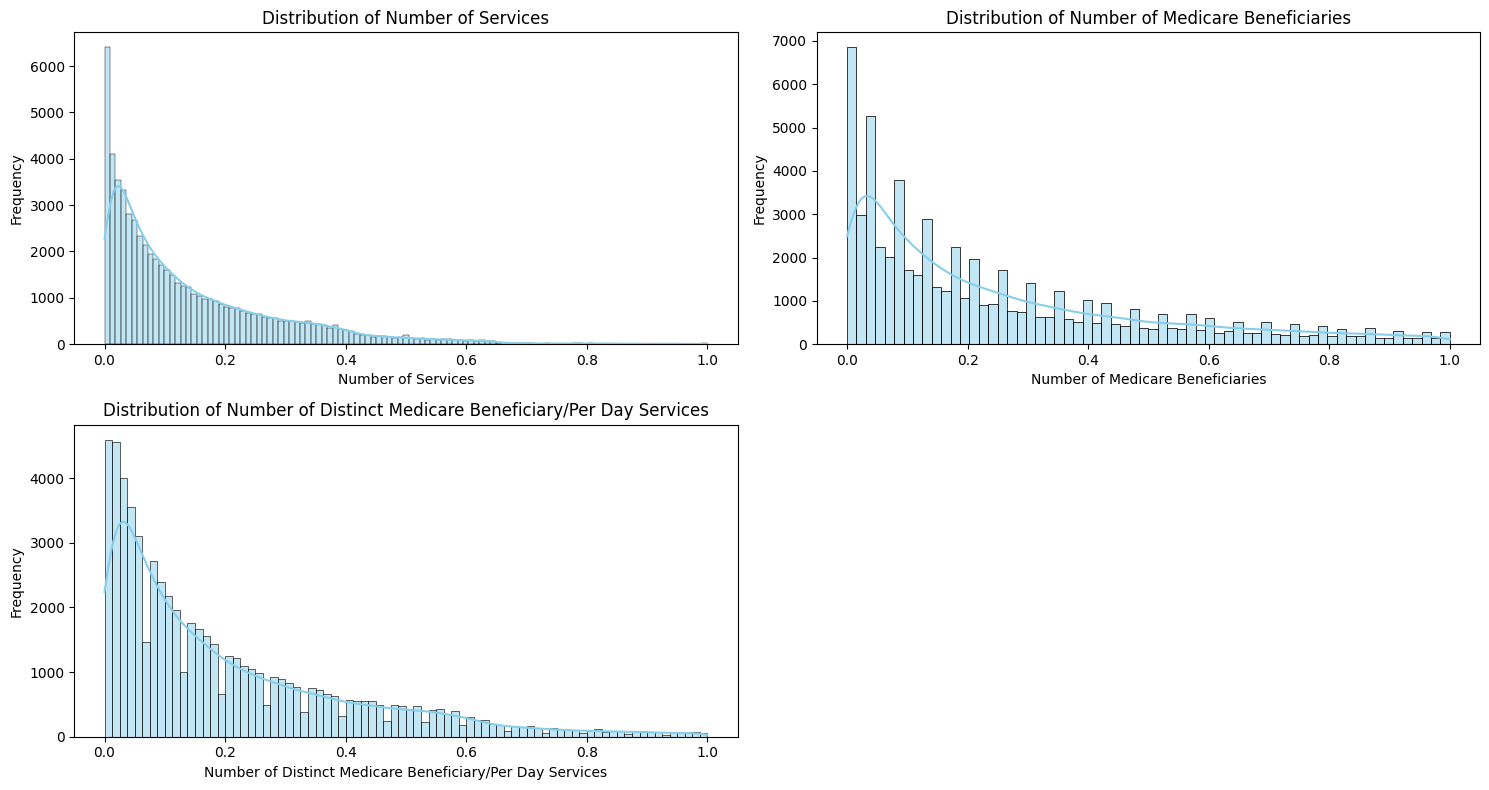

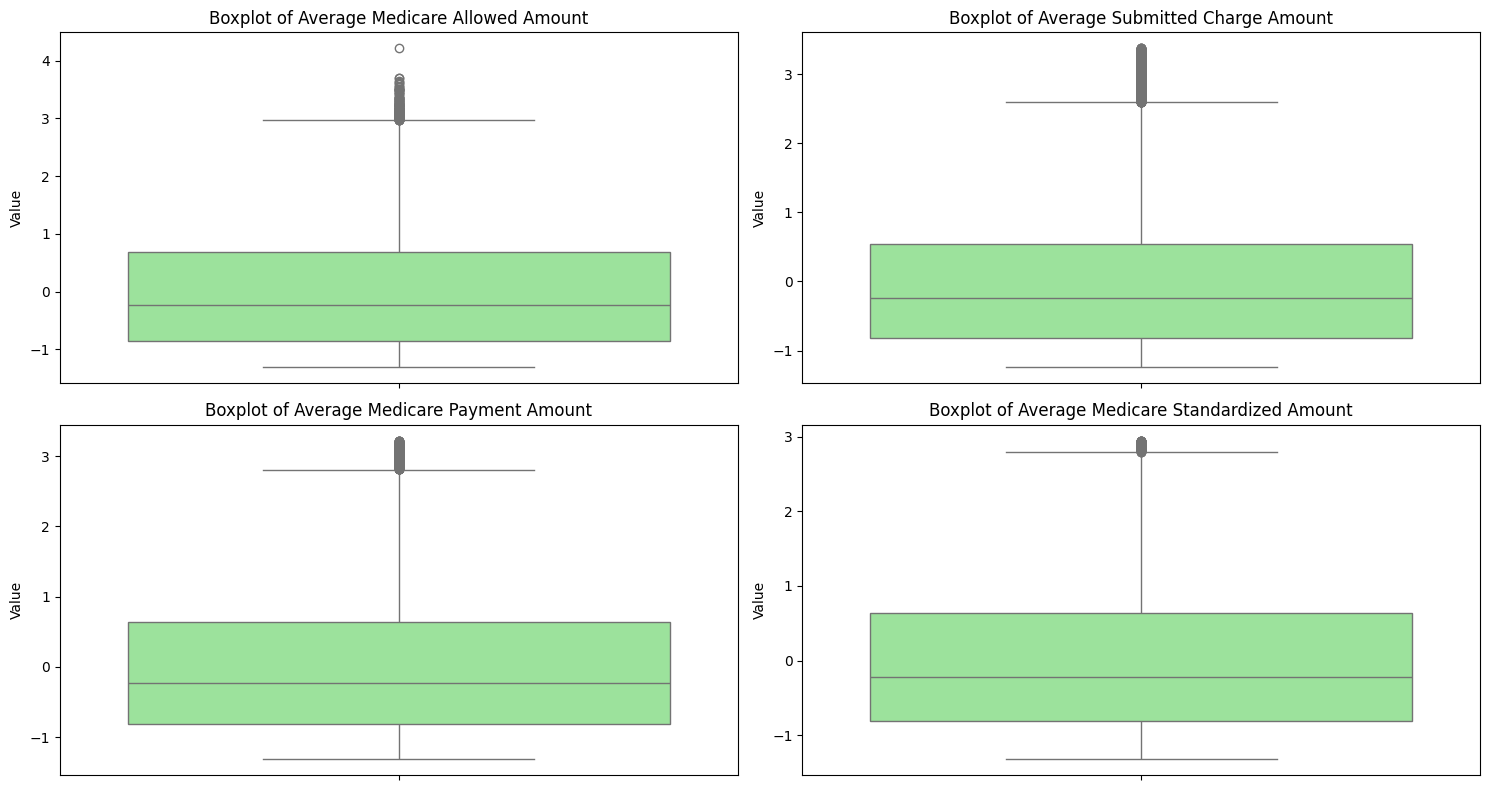

     index  National Provider Identifier  \
0  3001884                    1306820956   
1  7594822                    1770523540   
2   746159                    1073627758   
3  2137027                    1215943535   
4  6169160                    1629160551   

  Last Name/Organization Name of the Provider First Name of the Provider  \
0                                    DUROCHER                    RICHARD   
1                                     FULLARD                     JASPER   
2                                    PERROTTI                    ANTHONY   
3                                     BRUMITT                        TOM   
4                                   GALBREATH                     RONALD   

   Credentials of the Provider  Gender of the Provider  \
0                          332                       1   
1                          710                       1   
2                          310                       1   
3                          310                

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler


data = pd.read_csv('/iqr_data_cleaned.csv')

# Categorical columns for label encoding
label_encode_cols = [
    'Gender of the Provider',
    'Entity Type of the Provider',
    'Medicare Participation Indicator',
    'HCPCS Drug Indicator',
    'Credentials of the Provider',
    'HCPCS Code',
    'HCPCS Description'
]

# Categorical columns for one-hot encoding
one_hot_encode_cols = [
    'Provider Type',
    'Place of Service',
    'State Code of the Provider',
    'Country Code of the Provider'
]

# Initialize and apply label encoding
label_encoder = LabelEncoder()
for col in label_encode_cols:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])

# Apply one-hot encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols, drop_first=False)

# Replace boolean values with 'T'/'F'
data.replace({True: 'T', False: 'F'}, inplace=True)

# Columns to normalize (scale to range [0, 1])
normalize_cols = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services'
]

# Columns to standardize (zero mean, unit variance)
standardize_cols = [
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Normalize specified columns
normalizer = MinMaxScaler()
normalized_values = normalizer.fit_transform(data[normalize_cols])
normalized_data = pd.DataFrame(normalized_values, columns=normalize_cols)

# Standardize specified columns
scaler = StandardScaler()
standardized_values = scaler.fit_transform(data[standardize_cols])
standardized_data = pd.DataFrame(standardized_values, columns=standardize_cols)

# Combine processed columns back with the original dataset
processed_data = pd.concat(
    [data.drop(columns=normalize_cols + standardize_cols),
     normalized_data,
     standardized_data],
    axis=1
)

# Plotting distributions for normalized columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(normalize_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=processed_data, x=col, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplots for standardized columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(standardize_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=processed_data, y=col, color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Display the first few rows of the processed dataset
print(processed_data.head())

# Save the processed dataset
processed_data.to_csv('/final_dataset.csv', index=False)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6861 - val_loss: 0.1223
Epoch 2/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1641 - val_loss: 0.0829
Epoch 3/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1312 - val_loss: 0.0683
Epoch 4/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1148 - val_loss: 0.0595
Epoch 5/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1070 - val_loss: 0.0549
Epoch 6/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1017 - val_loss: 0.0474
Epoch 7/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0963 - val_loss: 0.0452
Epoch 8/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0959 - val_loss: 0.0423
Epoch 9/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0889 - val_loss: 0.0421
Epoch 10/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0881 - val_loss: 0.0401
Epoch 11/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0853 - val_loss: 0.0380
Epoch 12/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

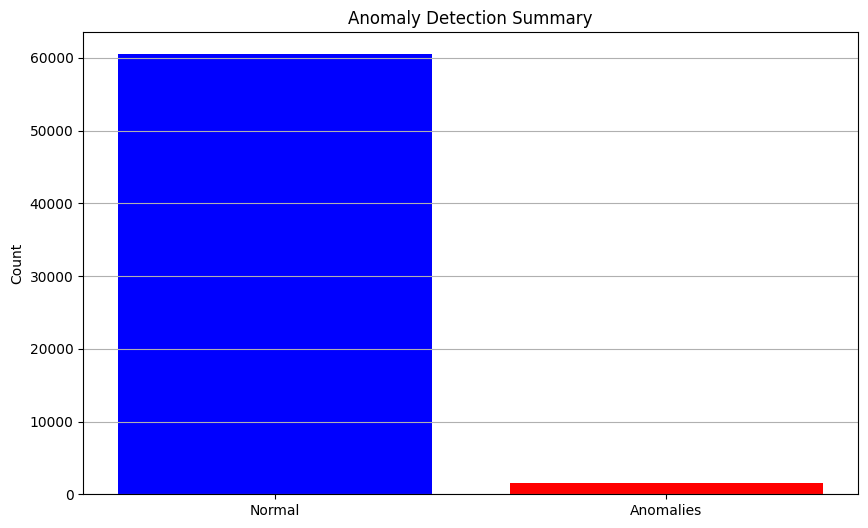


Model Performance Metrics:
Accuracy: 0.9940
Precision: 1.0000
Recall: 0.9506
F1-Score: 0.9747


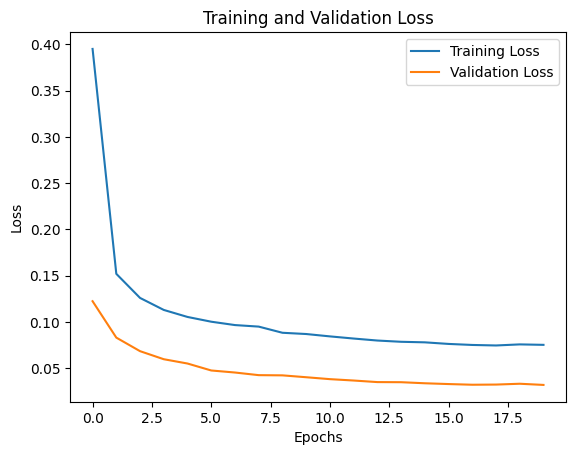

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
data = pd.read_csv('/final_dataset.csv')

# Features for normalization and standardization
num_features = [
    'Number of Services', 'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]

# Normalize and standardize specific columns
norm_cols = [
    'Number of Services', 'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services'
]
std_cols = [
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]

# Apply MinMaxScaler and StandardScaler
minmax = MinMaxScaler()
normalized = pd.DataFrame(minmax.fit_transform(data[norm_cols]), columns=norm_cols)

scaler = StandardScaler()
standardized = pd.DataFrame(scaler.fit_transform(data[std_cols]), columns=std_cols)

# Create final processed dataset
processed_data = pd.concat([data.drop(columns=norm_cols + std_cols), normalized, standardized], axis=1)

# Train-test split
train_data, test_data = train_test_split(
    processed_data[num_features], test_size=0.2, random_state=42
)

# Define the Autoencoder model
autoencoder_model = Sequential([
    Dense(int(train_data.shape[1] * 1.5), activation='relu', input_dim=train_data.shape[1]),
    BatchNormalization(),
    Dropout(0.2),
    Dense(int(train_data.shape[1] * 0.75), activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(int(train_data.shape[1] * 0.5), activation='relu'),
    BatchNormalization(),
    Dense(int(train_data.shape[1] * 0.75), activation='relu'),
    BatchNormalization(),
    Dense(int(train_data.shape[1] * 1.5), activation='relu'),
    BatchNormalization(),
    Dense(train_data.shape[1], activation='linear')
])

# Compile the model
autoencoder_model.compile(optimizer='adam', loss='mse')

# Early stopping for training
stop_early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Autoencoder
train_history = autoencoder_model.fit(
    train_data, train_data,
    epochs=20, batch_size=64, validation_split=0.2, callbacks=[stop_early], verbose=1
)

# Predict reconstruction error on the test data
test_predictions = autoencoder_model.predict(test_data)
reconstruction_error = np.mean(np.square(test_data - test_predictions), axis=1)

# Calculate anomaly threshold
error_threshold = reconstruction_error.mean() + reconstruction_error.std()

# Assign anomaly labels
processed_data['Anomaly'] = 0
processed_data.loc[test_data.index, 'Anomaly'] = (reconstruction_error > error_threshold).astype(int)

# Separate anomalous and normal data
anomalous_data = processed_data[processed_data['Anomaly'] == 1]
normal_data = processed_data[processed_data['Anomaly'] == 0]

# Display anomalies
print("\nAutoencoder Anomaly Detection Results:")
print(f"Total anomalies detected: {len(anomalous_data)}")
print(anomalous_data.head())

# Bar plot for anomaly summary
plt.figure(figsize=(10, 6))
counts = processed_data['Anomaly'].value_counts()
plt.bar(['Normal', 'Anomalies'], counts, color=['blue', 'red'])
plt.title('Anomaly Detection Summary')
plt.ylabel('Count')
plt.grid(axis='y')
plt.savefig('anomaly_summary.png')
plt.show()

# Tune threshold for the best F1 score
best_threshold, best_f1 = 0, 0
_, val_test_data = train_test_split(test_data, test_size=0.5, random_state=42)

for thresh in np.linspace(reconstruction_error.min(), reconstruction_error.max(), 100):
    val_preds = (reconstruction_error > thresh).astype(int)
    val_true = processed_data.loc[test_data.index, 'Anomaly']

    # Ensure consistent length
    val_preds = val_preds[:len(val_true)]

    f1 = f1_score(val_true, val_preds)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

# Final predictions
final_preds = (reconstruction_error > best_threshold).astype(int)
accuracy = accuracy_score(val_true, final_preds)
precision = precision_score(val_true, final_preds)
recall = recall_score(val_true, final_preds)
f1 = f1_score(val_true, final_preds)

# Display model performance
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Save processed data
processed_data.to_csv('autoencoder_anomalies_revised.csv', index=False)

# Plot training loss
plt.plot(train_history.history['loss'], label='Training Loss')
plt.plot(train_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('training_validation_loss.png')
plt.show()


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1240/1240 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0226 - val_loss: 0.0102
Epoch 2/15
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0087 - val_loss: 0.0094
Epoch 3/15
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0068 - val_loss: 0.0070
Epoch 4/15
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 5/15
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 6/15
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0055 - val_loss: 0.0064
Epoch 7/15
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 8/15
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0050 - val_loss: 0.0054
Epoch 9/15
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 10/15
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0050 - val_loss: 0.0053
Epoch 11/15
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0048 - val_loss: 0.0053
Epoch 12/15
1240/1240 ━━━━━━━━━━━━━━━━━━━

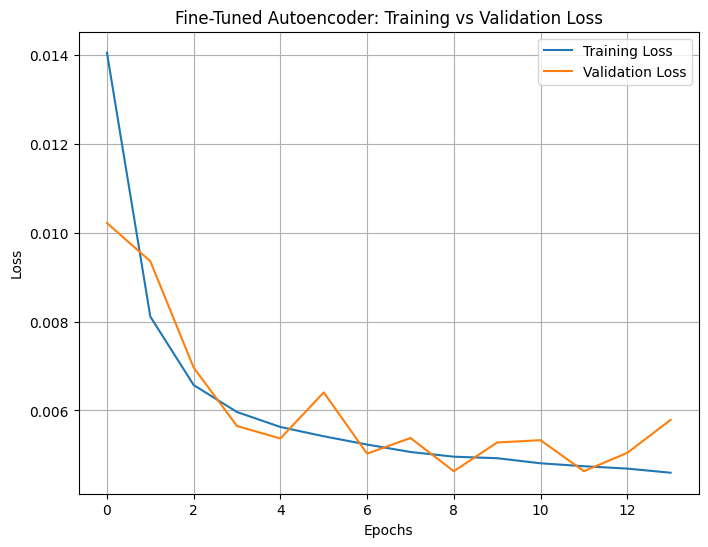

1550/1550 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


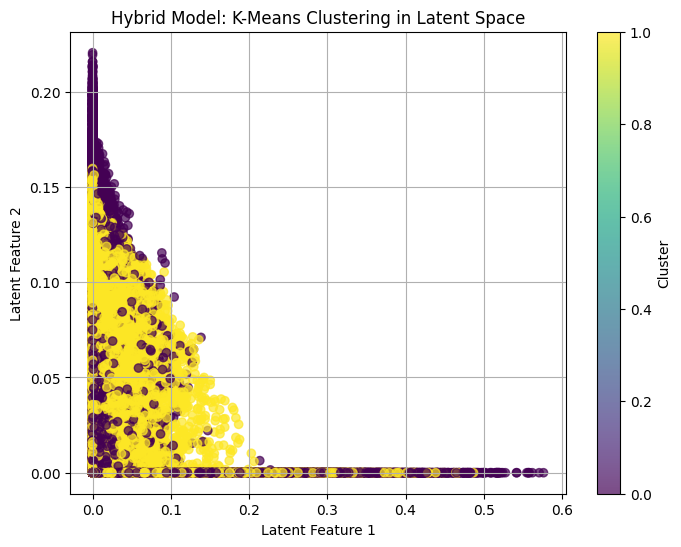

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
data = pd.read_csv('/final_dataset.csv')

# Normalize data
num_features = [
    'Number of Services', 'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]
scaler = MinMaxScaler()
normalized = pd.DataFrame(scaler.fit_transform(data[num_features]), columns=num_features)

# Split data
train_data, test_data = train_test_split(normalized, test_size=0.2, random_state=42)

# Fine-Tuned Autoencoder
autoencoder_model = Sequential([
    Dense(64, activation='relu', input_dim=train_data.shape[1]),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(train_data.shape[1], activation='linear')
])

autoencoder_model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = autoencoder_model.fit(
    train_data, train_data,
    epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stop]
)

# Plot training vs validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Fine-Tuned Autoencoder: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()









from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Exclude last layers
latent_layer_model = Sequential(autoencoder_model.layers[:-2])
latent_space = latent_layer_model.predict(train_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42).fit(latent_space)
clusters = kmeans.predict(latent_space)

# Detect anomalies
processed_data = pd.DataFrame({'Cluster': clusters})
processed_data['Anomaly'] = (processed_data['Cluster'] == 1).astype(int)

# Visualize clustering
plt.figure(figsize=(8, 6))
plt.scatter(latent_space[:, 0], latent_space[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('Hybrid Model: K-Means Clustering in Latent Space')
plt.xlabel('Latent Feature 1')
plt.ylabel('Latent Feature 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()



Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


620/620 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0269 - val_loss: 0.0157
Epoch 2/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0156 - val_loss: 0.0148
Epoch 3/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0145 - val_loss: 0.0144
Epoch 4/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0140 - val_loss: 0.0140
Epoch 5/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0137 - val_loss: 0.0151
Epoch 6/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0136 - val_loss: 0.0144
Epoch 7/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0135 - val_loss: 0.0127
Epoch 8/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0133 - val_loss: 0.0134
Epoch 9/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0133 - val_loss: 0.0132
Epoch 10/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0130 - val_loss: 0.0126
Epoch 11/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0129 - val_loss: 0.0127
Epoch 12/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.

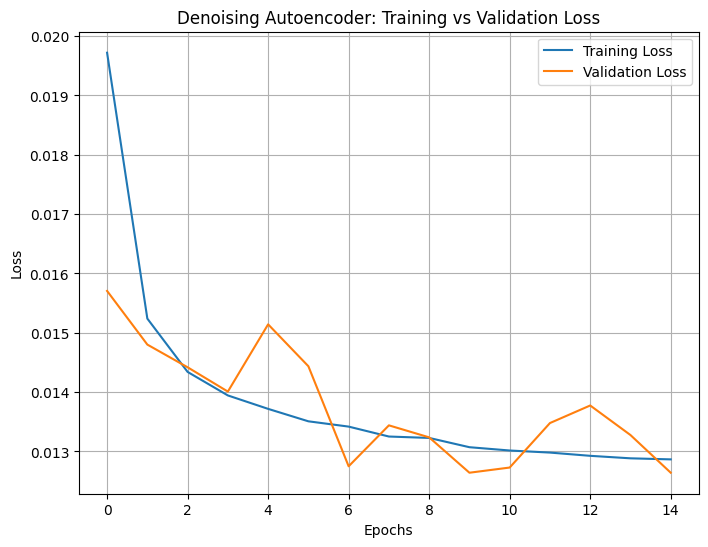

388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


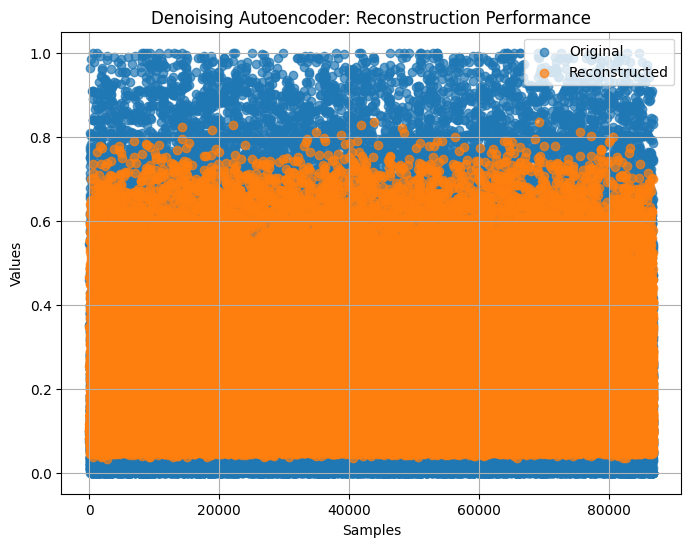

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


data = pd.read_csv('/final_dataset.csv')

# Normalize data
num_features = [
    'Number of Services', 'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]
scaler = MinMaxScaler()
normalized = pd.DataFrame(scaler.fit_transform(data[num_features]), columns=num_features)

# Split data
train_data, test_data = train_test_split(normalized, test_size=0.2, random_state=42)

# Add noise to the data for Denoising Autoencoder
noise_factor = 0.2
train_data_noisy = train_data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_data.shape)
train_data_noisy = np.clip(train_data_noisy, 0., 1.)  # Clip values to ensure they are between 0 and 1

# Denoising Autoencoder model
autoencoder_model = Sequential([
    Dense(128, activation='relu', input_dim=train_data.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(train_data.shape[1], activation='linear')
])

autoencoder_model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Denoising Autoencoder model
history = autoencoder_model.fit(
    train_data_noisy, train_data,
    epochs=30, batch_size=64, validation_split=0.2, callbacks=[early_stop]
)

# Plot training vs validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Denoising Autoencoder: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Reconstruct the data using the trained model
reconstructed_data = autoencoder_model.predict(test_data)
# Visualize the original vs reconstructed data for a few samples
plt.figure(figsize=(8, 6))

# Flatten both the original and reconstructed data for plotting
plt.scatter(range(len(test_data.values.flatten())), test_data.values.flatten(), label='Original', alpha=0.7)
plt.scatter(range(len(reconstructed_data.flatten())), reconstructed_data.flatten(), label='Reconstructed', alpha=0.7)

plt.title('Denoising Autoencoder: Reconstruction Performance')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()
